In [106]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [107]:
# Import necessary libraries
import pandas as pd
import nltk
import acquire, prepare, wrangle
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [108]:
prepare.custom_visual()

This function configures some visual settings to enhance the readability and aesthetics of data visualizations. The settings include configuring the Seaborn style to darkgrid for better visual contrast and readability, setting the Matplotlib style to dark_background for a visually appealing dark theme, setting the default float format in Pandas to display two decimal places, setting the maximum column width in Pandas to display the entire content without truncation, setting the display width in Pandas to match the terminal/console width, and resetting the column header justification in Pandas to its default (left-aligned). Additionally, the function sets the maximum number of rows to display to 400.


In [109]:
# Load the spam data set
df = pd.read_csv('spam.csv')

In [110]:
df

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...,...
5512,5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5513,5568,ham,Will Ì_ b going to esplanade fr home?
5514,5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5515,5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5517 non-null   object
 1   label   5515 non-null   object
 2   text    5515 non-null   object
dtypes: object(3)
memory usage: 129.4+ KB


In [112]:
df['text'] = df['text'].astype(str)

In [113]:
# Preprocessing: In order to make bigrams and trigrams, you need to have your text data in a list of words format.
df['text'] = df['text'].apply(nltk.word_tokenize)

In [114]:
# Create and explore bigrams for the spam data
# We'll first separate out the spam messages
spam_messages = df[df['label'] == 'spam']['text']

In [115]:
# Get the bigrams
spam_bigrams = [list(ngrams(message, 2)) for message in spam_messages]

In [116]:
# Flatten the list of bigrams and get the most common ones
spam_bigrams = [bigram for message in spam_bigrams for bigram in message]
print("Most common spam bigrams:")
print(Counter(spam_bigrams).most_common(10))

Most common spam bigrams:
[(('.', 'Call'), 79), (('*', '*'), 61), (('now', '!'), 54), (('T', '&'), 50), (('.', 'To'), 44), (('You', 'have'), 39), (('!', 'Your'), 39), (('to', 'contact'), 37), (('have', 'won'), 36), (('URGENT', '!'), 34)]


In [117]:
# Do the same for the ham messages
ham_messages = df[df['label'] == 'ham']['text']
ham_bigrams = [list(ngrams(message, 2)) for message in ham_messages]
ham_bigrams = [bigram for message in ham_bigrams for bigram in message]
print("\nMost common ham bigrams:")
print(Counter(ham_bigrams).most_common(10))


Most common ham bigrams:
[(('.', 'I'), 364), (('&', 'lt'), 314), (('lt', ';'), 314), (('&', 'gt'), 314), (('gt', ';'), 314), (('I', "'m"), 281), (('#', '&'), 280), ((';', '#'), 276), ((':', ')'), 250), ((',', 'I'), 161)]


In [118]:
# Check for overlap in bigrams
# We'll create sets of the unique bigrams in each category and get the intersection
spam_bigrams_set = set(spam_bigrams)
ham_bigrams_set = set(ham_bigrams)
overlap = spam_bigrams_set.intersection(ham_bigrams_set)
print("\nNumber of overlapping bigrams:", len(overlap))


Number of overlapping bigrams: 1467


In [119]:
# 3. Create and explore with trigrams
spam_trigrams = [list(ngrams(message, 3)) for message in spam_messages]
spam_trigrams = [trigram for message in spam_trigrams for trigram in message]
print("\nMost common spam trigrams:")
print(Counter(spam_trigrams).most_common(10))


Most common spam trigrams:
[(('*', '*', '*'), 51), (('T', '&', 'C'), 23), (('have', 'won', 'a'), 23), (('T', '&', 'Cs'), 21), (('prize', 'GUARANTEED', '.'), 19), (('GUARANTEED', '.', 'Call'), 19), (('to', 'No', ':'), 17), (('å£1000', 'cash', 'or'), 17), (('URGENT', '!', 'Your'), 17), (('&', 'C', "'s"), 16)]


In [120]:
ham_trigrams = [list(ngrams(message, 3)) for message in ham_messages]
ham_trigrams = [trigram for message in ham_trigrams for trigram in message]
print("\nMost common ham trigrams:")
print(Counter(ham_trigrams).most_common(10))


Most common ham trigrams:
[(('&', 'lt', ';'), 314), (('&', 'gt', ';'), 314), (('lt', ';', '#'), 276), ((';', '#', '&'), 276), (('#', '&', 'gt'), 276), ((':', '-', ')'), 103), (('&', 'amp', ';'), 86), ((',', 'I', "'ll"), 68), (('gt', ';', '.'), 50), (('.', 'I', "'m"), 46)]


In [54]:
import pandas as pd
import nltk
from nltk import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [55]:
# Load the spam data set
# Assuming 'spam.csv' has columns 'text' and 'label' (spam or ham)
df = pd.read_csv('spam.csv')

In [56]:
# Split the dataframe into spam and ham
spam_df = df[df['label'] == 'spam']
ham_df = df[df['label'] == 'ham']

In [57]:
# 1. Create and explore bigrams for the spam data
spam_bigrams = list(nltk.bigrams(spam_df['text'].str.split().sum()))

# Count the bigrams and get the 10 most common
spam_bigram_counts = pd.Series(Counter(spam_bigrams)).sort_values(ascending=False).head(10)

In [58]:
spam_bigram_counts

You     have       39
to      contact    37
have    won        36
you     have       32
This    is         30
won     a          27
Please  call       26
or      a          25
U       have       24
your    mobile     24
dtype: int64

In [63]:
top_20_spam_bigrams

0    39
1    37
2    36
3    32
4    30
5    27
6    26
7    25
8    24
9    24
Name: 0, dtype: int64

In [29]:
ham_bigrams = list(nltk.bigrams(ham_df['text'].str.split().sum()))
ham_bigram_counts = pd.Series(Counter(ham_bigrams)).sort_values(ascending=False).head(10)

In [31]:
# Check for overlap in bigrams between spam and ham
overlap_bigrams = set(spam_bigrams).intersection(set(ham_bigrams))

# Get counts for overlapping bigrams and plot
overlap_bigram_counts = pd.Series(Counter([bigram for bigram in spam_bigrams + ham_bigrams if bigram in overlap_bigrams])).sort_values(ascending=False).head(10)

In [33]:
# Create and explore trigrams for both spam and ham data
spam_trigrams = list(ngrams(spam_df['text'].str.split().sum(), 3))
ham_trigrams = list(ngrams(ham_df['text'].str.split().sum(), 3))

# Count the trigrams and get the 10 most common for spam
spam_trigram_counts = pd.Series(Counter(spam_trigrams)).sort_values(ascending=False).head(10)
ham_trigram_counts = pd.Series(Counter(ham_trigrams)).sort_values(ascending=False).head(10)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

In [66]:
# Load the data
df = pd.read_csv('spam.csv')

In [67]:
df

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...,...
5512,5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5513,5568,ham,Will Ì_ b going to esplanade fr home?
5514,5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5515,5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5517 non-null   object
 1   label   5515 non-null   object
 2   text    5515 non-null   object
dtypes: object(3)
memory usage: 129.4+ KB


In [69]:
# Drop the 'id' column
df = df.drop(columns='id')

In [70]:
# Reset the index
df = df.reset_index(drop=True)

In [71]:
# Convert 'text' column to string
df['text'] = df['text'].astype(str)

In [72]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5512,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5513,ham,Will Ì_ b going to esplanade fr home?
5514,ham,"Pity, * was in mood for that. So...any other suggestions?"
5515,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [76]:
# Separate data
ham_messages = df[df.label=='ham']
spam_messages = df[df.label=='spam']

In [77]:
# CountVectorizer will convert collection of text documents to a matrix of token counts
vect = CountVectorizer(ngram_range=(2, 2))  

In [79]:
# This step will convert text into tokens 
ham_words = vect.fit_transform(ham_messages['text'])
spam_words = vect.fit_transform(spam_messages['text'])

In [80]:
# Function to return value counts as a dataframe
def value_counts_df(df, column):
    absolute = pd.DataFrame(df[column].value_counts())
    percent = pd.DataFrame(df[column].value_counts(normalize=True))
    df_value_counts = pd.concat([absolute, percent], axis=1)
    df_value_counts.columns = ['n', 'percent']
    return df_value_counts

In [81]:
labels = value_counts_df(df, 'label')
print(labels)

         n              percent
ham   4777                 0.87
spam   738                 0.13


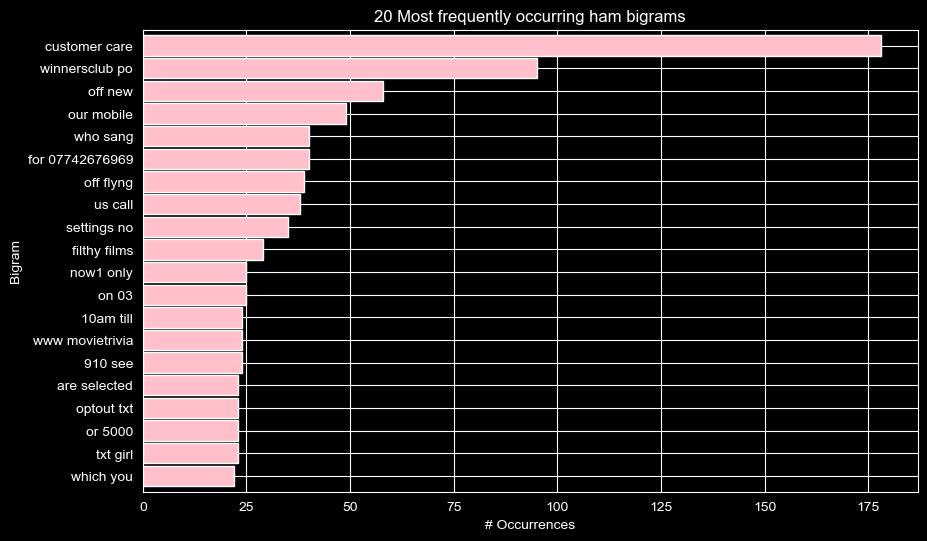

In [92]:
# Get the number of features
num_features = len(vect.get_feature_names_out())

# reshape the data to have the same number of columns
ham_bigrams = pd.DataFrame(ham_words.toarray()[:,:num_features], columns=vect.get_feature_names_out())

# Visualize top 20 ham bigrams
top_20_ham_bigrams = ham_bigrams.sum().sort_values(ascending=False).head(20)
top_20_ham_bigrams.sort_values().plot(kind='barh', color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')

plt.show()

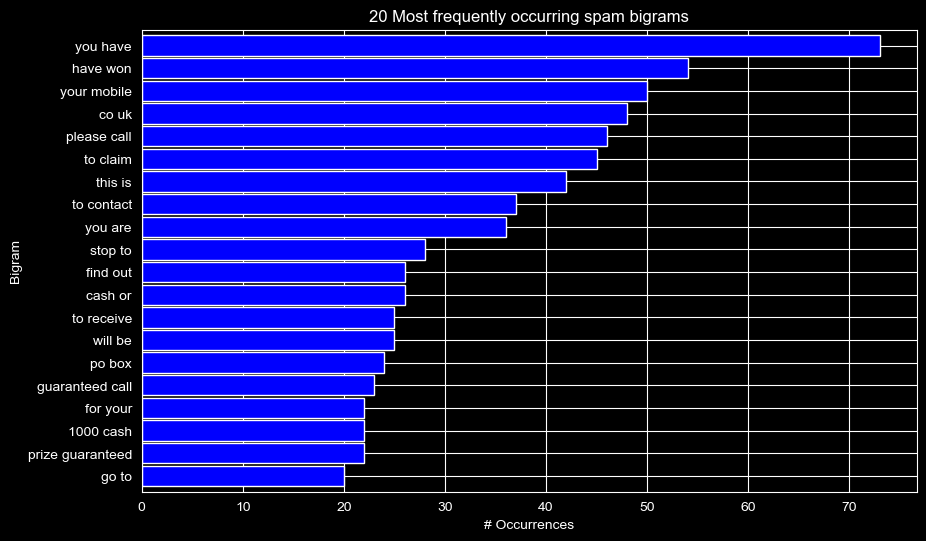

In [93]:
# Visualize top 20 spam bigrams
spam_bigrams = pd.DataFrame(spam_words.toarray(), columns=vect.get_feature_names_out())
top_20_spam_bigrams = spam_bigrams.sum().sort_values(ascending=False).head(20)
top_20_spam_bigrams.sort_values().plot(kind='barh', color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')

plt.show()

In [96]:
# Check overlap in bigrams
overlap_bigrams = list(set(top_20_ham_bigrams.index) & set(top_20_spam_bigrams.index))
print('Overlap bigrams: ', overlap_bigrams)

Overlap bigrams:  []


In [101]:
# Create and explore trigrams
vect_tri = CountVectorizer(ngram_range=(3, 3))  # We are telling it to use trigrams

# fit and transform with the new instance
ham_words_tri = vect_tri.fit_transform(df[df.label == 'ham'].text)

spam_words = vect.fit_transform(spam_messages['text'])

# create the DataFrame
ham_trigrams = pd.DataFrame(ham_words_tri.toarray(), columns=vect_tri.get_feature_names_out())

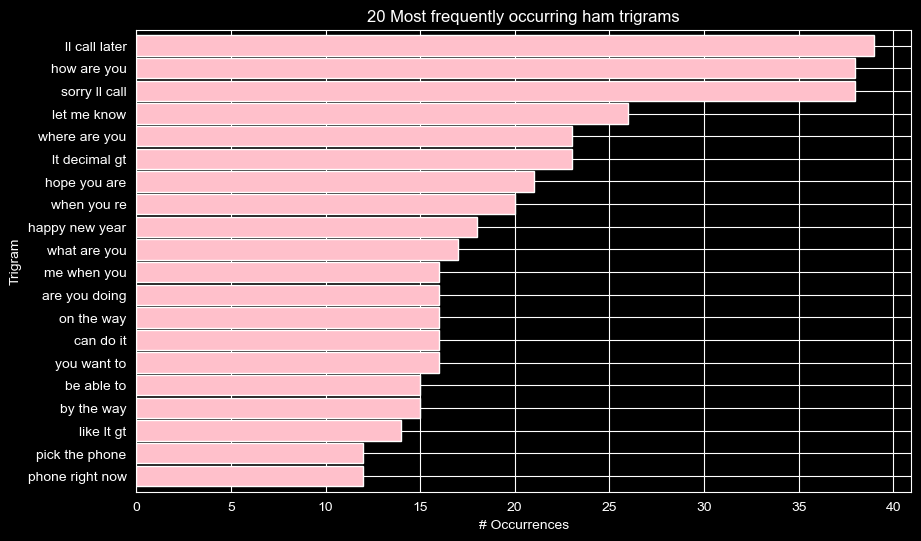

In [102]:
# Visualize top 20 ham trigrams
top_20_ham_trigrams = ham_trigrams.sum().sort_values(ascending=False).head(20)
top_20_ham_trigrams.sort_values().plot(kind='barh', color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occurring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurrences')

plt.show()

In [104]:
# create a new CountVectorizer instance for trigrams
vect_tri_spam = CountVectorizer(ngram_range=(3,3))

# fit and transform with the new instance
spam_words_tri = vect_tri_spam.fit_transform(df[df.label == 'spam'].text)

# create the DataFrame
spam_trigrams = pd.DataFrame(spam_words_tri.toarray(), columns=vect_tri_spam.get_feature_names_out())

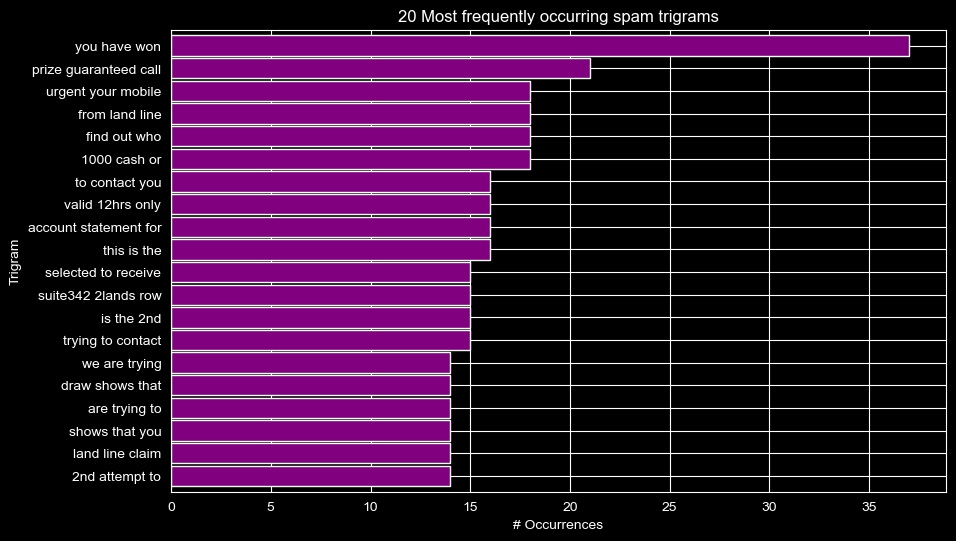

In [105]:
top_20_spam_trigrams = spam_trigrams.sum().sort_values(ascending=False).head(20)

top_20_spam_trigrams.sort_values().plot(kind='barh', color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occurring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurrences')

plt.show()